# Seattle Airbnb Data Analysis Project

This sheet is a part of the Udacity data science nanodegree course, I have analyzed the Airbnb Seattle dataset of 2016.

# 1. Business Values:

Following are the questions I will answer doing my work:

1. What is the highest price of listing?
2. What is the average monthly charged price? 
3. How fast Host respond?
4. What are the popular neighbourhoods area and Most expensive\cheapest neighbourhoods in Seattle?
5. What are affects of reviewer ratings ?
6. Does certain faclities impact on price?
    

# 2. Data Consolidation:
Data gathering, wrangling and get results from data

In [3]:
###Required Python Libraries

import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import cm as cm
%matplotlib inline


In [4]:
### Read the CSV files

df_calendar=pd.read_csv('calendar.csv')
df_listing=pd.read_csv('listings.csv')

In [5]:
### looking the Calendar datasets first 10 row

df_calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [6]:
###looking the Calendar datasets tail

df_calendar.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


In [7]:
### looking the Listings dataset first 5 row

df_listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Data Analytic of Calendar dataset

1. Find the number of rows and columns
2. Find the Missing values
3. Calendar Data statistic and datatypes
4. Data Wrangling: <ul>
    <li>Clean and convert Price from String to Float </li>
    <li>Convert dates to Months</li>
    </ul>

In [8]:
### Data Analytic of Calendar dataset

# Number of rows and columns
print('Number of rows and columns:',df_calendar.shape)
print()
print()

# Number of missing values in Dataset
print('Percentage of Missing values:',(df_calendar.isnull().sum()/len(df_calendar))*100)
print()

Number of rows and columns: (1393570, 4)


Percentage of Missing values: listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64



In [9]:
### Data Analytic of Calendar dataset

# Describe command to get the data statistic
df_calendar.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-08-16,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [10]:
# Calendar dataset datatype finding

df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [11]:
### Data Cleaning Part

# Str conversion and remove the comma and dollar sign.
# Conversion to float

df_calendar["price"]=df_calendar["price"].astype(str).str.replace(',','')
df_calendar["price"]=df_calendar["price"].astype(str).str.replace('$','')

df_calendar["price"]=df_calendar["price"].astype(float)

In [12]:
### Data Cleaning Part
# Replace the missing price values and convert to 0. It would not affect the data set'  

df_calendar["price"].fillna(0, inplace=True)
df_calendar["price"].head()

0    85.0
1    85.0
2     0.0
3     0.0
4     0.0
Name: price, dtype: float64

In [13]:
### Data Cleaning Part

## Convert dates to Months

# First find the date range (start and end date).

print(" Start and End Date range: ",df_calendar['date'].min(),"to ", df_calendar['date'].max())
print()
print()

## convert date to months

df_calendar['date_column'] = pd.to_datetime(df_calendar['date'])

df_calendar['Month']=df_calendar['date_column'].dt.month

df_calendar['Month'].head()

 Start and End Date range:  2016-01-04 to  2017-01-02




0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

##  Business Values Analysis 

In [14]:
### Sum of all prices charged through the year

total_earning=np.sum(df_calendar["price"])
print(" Total amount earnings in full year: $",total_earning)

 Total amount earnings in full year: $ 128915264.0


In [15]:
### Sum of all prices charged per month

monthly_earning=df_calendar.groupby('Month')['price'].count()
print(monthly_earning)

Month
1     114540
2     110722
3     118358
4     114540
5     118358
6     114540
7     118358
8     118358
9     114540
10    118358
11    114540
12    118358
Name: price, dtype: int64


Text(0, 0.5, 'monthly_earning')

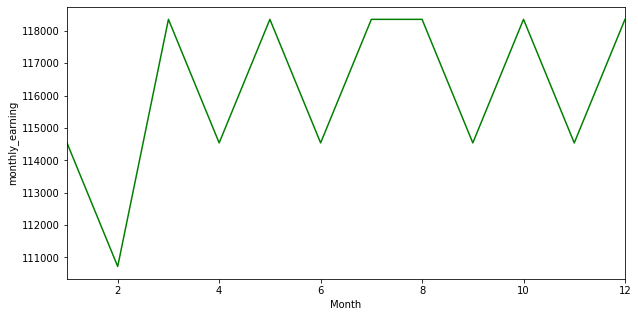

In [16]:
monthly_earning=df_calendar.groupby('Month')['price'].count().plot(figsize=(10,5),color = 'g')
plt.ylabel('monthly_earning')

In [17]:
### Average price charged per listing for the year

avg_price=total_earning/df_calendar['listing_id'].nunique()  
print("Average price per listing for the year: $",round(avg_price,0))
print()


### Average price charged per listing 

print("Average price charged per listing: $", round(df_calendar['price'].mean(),0))

Average price per listing for the year: $ 33765.0

Average price charged per listing: $ 93.0


In [18]:
### Average price charged per listings

mean_price_listing=df_calendar.groupby('listing_id')['price'].mean()
mean_price_listing

listing_id
3335        101.589041
4291         82.000000
5682         45.668493
6606         92.849315
7369         12.342466
               ...    
10332096     40.000000
10334184    118.684932
10339144      0.000000
10339145    237.904110
10340165     42.175342
Name: price, Length: 3818, dtype: float64

In [19]:
### Top 10 most expensive listings "Avg price"

print("Top 10 most expensive listings Avg price: $",round(mean_price_listing.nlargest(10).mean(),0))

Top 10 most expensive listings Avg price: $ 814.0


In [20]:
### Most available Listings through the year

listing_avaialble=(df_calendar.groupby('available')['listing_id'].count()/df_calendar.shape[0])*100

print("Most available Listings through the year:", round(listing_avaialble,0))

Most available Listings through the year: available
f    33.0
t    67.0
Name: listing_id, dtype: float64


In [21]:
### Listings average Price charged per month

df_calendar.groupby('Month')['price'].mean()

Month
1      69.683499
2      82.308439
3      91.233047
4      89.683700
5      94.281823
6      99.453597
7      95.377854
8      97.181255
9      96.612092
10     95.444659
11     96.879911
12    100.958803
Name: price, dtype: float64

Text(0, 0.5, 'Average Price')

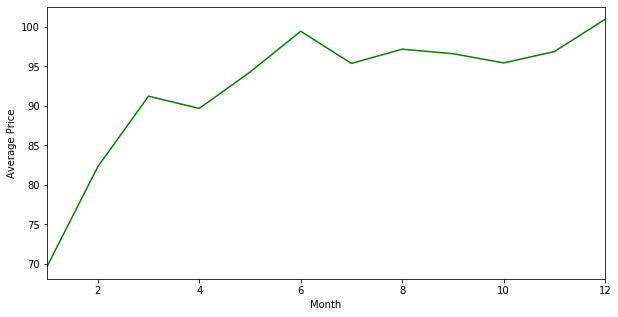

In [22]:
month_price=df_calendar.groupby('Month')['price'].mean().plot(figsize=(10,5),color = 'g')
plt.ylabel('Average Price')

# Data Analytic of Listing dataset

1. Find the number of rows and columns and Missing Values
2. Describe the variables in the dataset and look at the datatypes
3. Data Wrangling: Clean/convert Price from String to Float
4. Find all the categorical and quantitative variables
5. Business Values of Listings data

In [23]:
### For the listings dataset

# Number of rows and columns
print('Number of rows and columns:',df_listing.shape)
print()
print()


# Number of missing values

print('Percentage of Missing values:',(df_listing.isnull().sum()/len(df_listing))*100)
print()


Number of rows and columns: (3818, 92)


Percentage of Missing values: id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
                                      ...    
cancellation_policy                  0.000000
require_guest_profile_picture        0.000000
require_guest_phone_verification     0.000000
calculated_host_listings_count       0.000000
reviews_per_month                   16.422211
Length: 92, dtype: float64



In [24]:
# Describe the variables in the dataset and look at the datatypes

print(df_listing.describe(include='all'))

                  id                           listing_url     scrape_id  \
count   3.818000e+03                                  3818  3.818000e+03   
unique           NaN                                  3818           NaN   
top              NaN  https://www.airbnb.com/rooms/6610942           NaN   
freq             NaN                                     1           NaN   
mean    5.550111e+06                                   NaN  2.016010e+13   
std     2.962660e+06                                   NaN  0.000000e+00   
min     3.335000e+03                                   NaN  2.016010e+13   
25%     3.258256e+06                                   NaN  2.016010e+13   
50%     6.118244e+06                                   NaN  2.016010e+13   
75%     8.035127e+06                                   NaN  2.016010e+13   
max     1.034016e+07                                   NaN  2.016010e+13   

       last_scraped                    name  \
count          3818                    3

In [25]:
# Data Wrangling: Clean/convert Price from String to Float

df_listing["price"]=df_listing["price"].astype(str).str.replace('$','')

df_listing["price"]=df_listing["price"].astype(str).str.replace(',','')

df_listing["price"]=df_listing["price"].astype(float)

In [26]:
# Categorical variables identification

df_listing.select_dtypes(include="object").columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       

In [27]:
# Quantitative variables identification

df_listing.select_dtypes(include=("float64","int64")).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

##  Business Values Analysis of Listings dataset
1. Price Values change  Analysis
2. Host Response Analysis
3. Popluar Neighbourhood Analysis
4. Reviewer's ratings affect the customer or price 

### 1. Price Values change analysis

Text(0.5, 1.0, 'Top 10 listings charging the highest price')

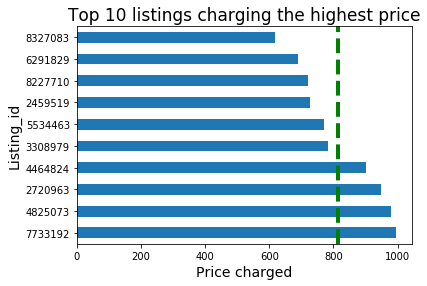

In [48]:
# Highest charging price listings

mean_price_listing=df_calendar.groupby('listing_id')['price'].mean()
mean_price_listing.nlargest(10).plot(kind="barh",figsize=(8,7),color = "b",fontsize=12);
plt.xlabel('Price charged',fontsize=14)
plt.ylabel('Listing_id',fontsize=14)
plt.axvline(mean_price_listing.nlargest(10).mean(),color='g',linestyle='--', linewidth=4)
plt.title("Top 10 listings charging the highest price",fontsize=17)

# Average price of top 10= $814

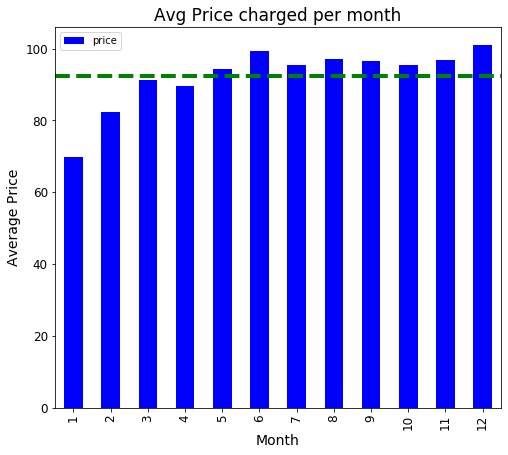

In [29]:
# The months with highest price

mth_price_listing=df_calendar.groupby('Month')['price'].mean()
mth_price_listing.plot(kind="bar",figsize=(8,7),color = 'b',fontsize=12);
plt.xlabel('Month',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title("Avg Price charged per month",fontsize=17)
plt.axhline(mth_price_listing.mean(),color='g',linestyle='--',linewidth=4)
plt.legend()

# Average monthlu price= $92

### Charged Price Observation:<br>
Highest price is recorded in June (Summer vacation time) and December (Christmas vacation time) which reflects that vacation time is busiest time that tend to rise price.
In Q1 2016, price charged was lower than the average for the whole year due to low demand time. 

###  2. Host Response Analysis

In [49]:
# Host response time

df_listing['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

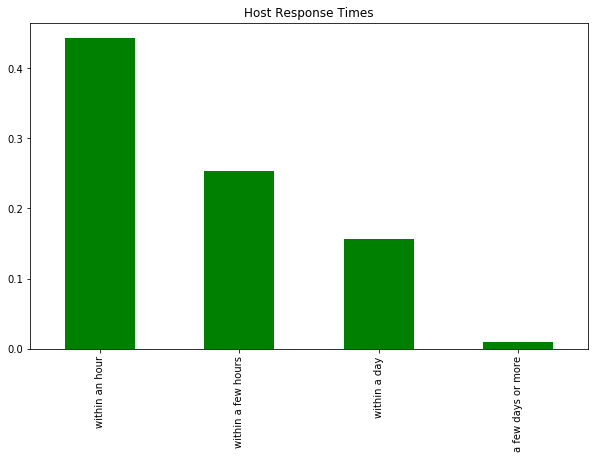

In [31]:
# Host_response_time Plot

host_response_vals = df_listing['host_response_time'].value_counts()
(host_response_vals/df_listing.shape[0]).plot(kind="bar",figsize=(10,6),color = 'g');
plt.title("Host Response Times");


### Host Response Times Observation:
Apporx half of hosts respond within an hour and impact is discussed in last task.

### 3. Popular Neighborhood Analysis

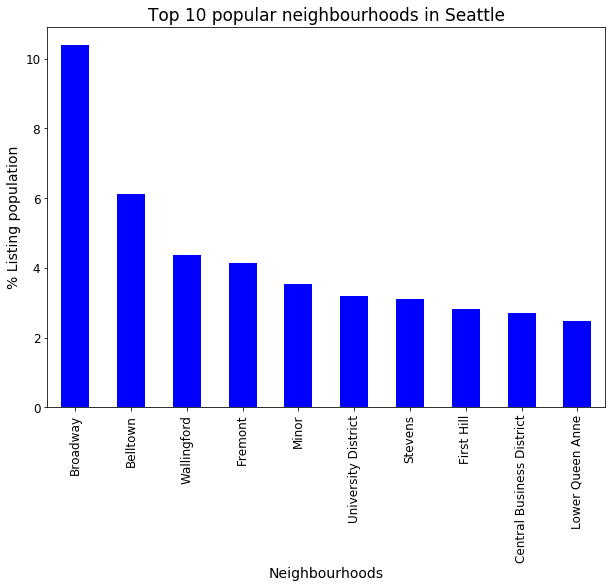

In [53]:
# Top 10 popular neighbour hoods
neighbourhood=df_listing['neighbourhood_cleansed'].value_counts()

((neighbourhood[0:10]/df_listing.shape[0])*100).plot(kind="bar",figsize=(10,7),color = 'b',fontsize=12);
plt.ylabel('% Listing population',fontsize=14)
plt.xlabel('Neighbourhoods',fontsize=14)
plt.title("Top 10 popular neighbourhoods in Seattle",fontsize=17);

Text(0.5, 0, 'Neighbourhoods')

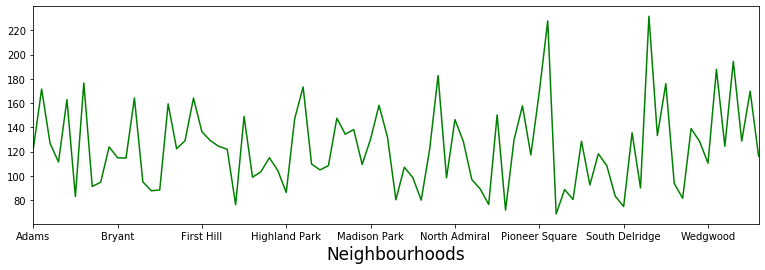

In [33]:
# Average price per neighbourhood
neighbourhood_price=df_listing.groupby('neighbourhood_cleansed')['price'].mean().plot(figsize=(13,4),color = 'g')
plt.xlabel('Neighbourhoods',fontsize= 17)

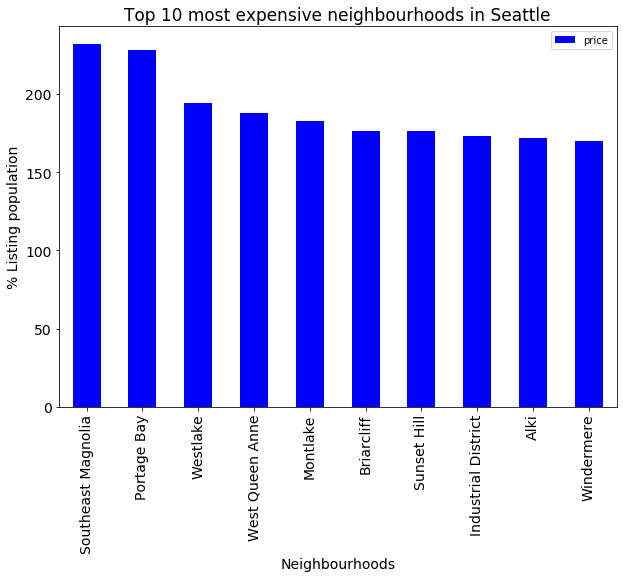

In [54]:
# Top 10 expensive neighbourhoods
top10_nh = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values("price",ascending=False).head(10)
top10_nh.plot(kind="bar",figsize=(10,7),color = 'b',fontsize=14)
plt.ylabel('% Listing population',fontsize=14)
plt.xlabel('Neighbourhoods',fontsize=14)

plt.title("Top 10 most expensive neighbourhoods in Seattle",fontsize=17);

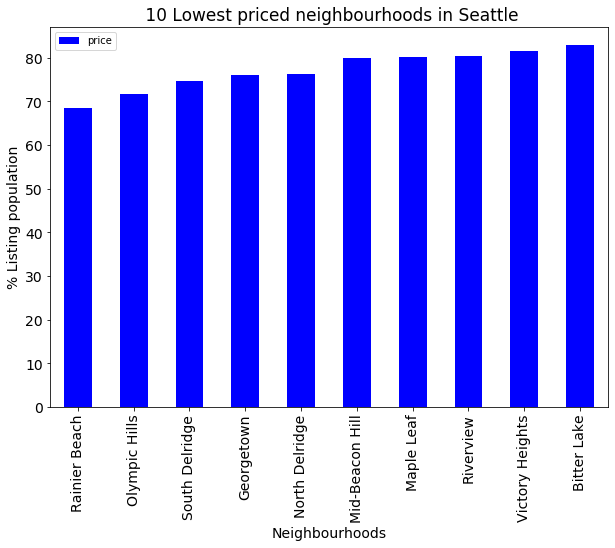

In [55]:
# 10 Cheapest neighbourhoods
bottom10_nh = df_listing.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values("price",ascending=True).head(10)
bottom10_nh.plot(kind="bar",figsize=(10,7),color = 'b',fontsize=14)
plt.ylabel('% Listing population',fontsize=14)
plt.xlabel('Neighbourhoods',fontsize=14)
plt.title(" 10 Lowest priced neighbourhoods in Seattle",fontsize=17);

### Neighborhoods areas Observation:

20% of the properties are located in Broadway, Belltown and Wallingford. 
Southeast Magnolia, Portage Bay and Westlake are expensive areas.
Rainier Beach, Olympic Hills and South Delridge are cheaper areas.

### 4. Reviewer's ratings affect the customer or price

In [36]:
# Created a dataframe with ratings scores

df_reviews=df_listing[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','price']]

# Correlation matrix
corr_ratings=df_reviews.corr()
corr_ratings

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
review_scores_rating,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.055551
review_scores_accuracy,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878,0.019026
review_scores_cleanliness,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354,0.054357
review_scores_checkin,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263,0.007877
review_scores_communication,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772,0.012990
review_scores_location,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252,0.075069
review_scores_value,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000,-0.041776
price,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,1.000000


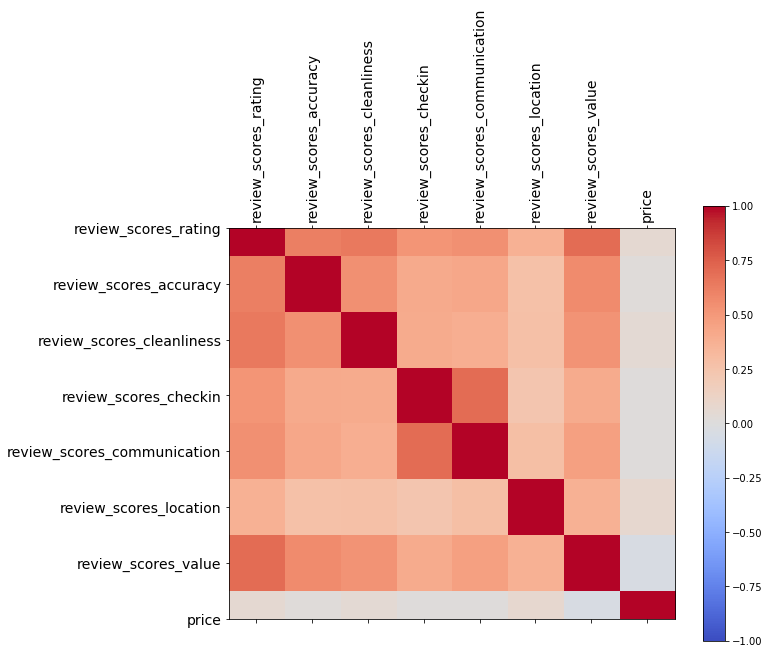

In [37]:
def correlation_matrix(df_reviews):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    """
    Confusion matrix plot helps to get correlation and see the relatioship of each variables with others
    In Matrix plot the correlation is color coded from blue to grey to red (from low to high correlation) 
    Diagonally dark red boxes from top to bottom shows the correlation of the variable with itself.
    
    """



    corr=df_reviews.corr()
    fig=plt.figure(figsize=(10, 8))
    ax=fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df_reviews.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df_reviews.columns,fontsize=14)
    ax.set_yticklabels(df_reviews.columns,fontsize=14)
    plt.show()
# Creating a confusion matrix for review ratings
correlation_matrix(df_reviews)

### Reviewer's ratings Observation:
__Ratings__: Cleanliness is very important for good rating because Matrix plot represents that Cleanliness has the highest correlation with over all other ratings. Good communication with the customer is highly correlated with the check in rating. . 

__Ratings and price__: Ratings have little impact on the price charged by the host. Location has a low positive correlation with price.

In [56]:
# Created a dataframe with facilities listed

df_facilities=df_listing[['bathrooms', 'bedrooms', 'beds','guests_included',
       'minimum_nights', 'maximum_nights','price']]

# Correlation matrix
corr_facl=df_facilities.corr()
corr_facl

,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,price
bathrooms,1.000000,0.610937,0.532838,0.304780,0.006358,-0.015322,0.516424
bedrooms,0.610937,1.000000,0.753167,0.457009,0.011957,-0.008591,0.627720
beds,0.532838,0.753167,1.000000,0.460512,0.002670,-0.009114,0.589525
guests_included,0.304780,0.457009,0.460512,1.000000,-0.001659,-0.018637,0.392875
minimum_nights,0.006358,0.011957,0.002670,-0.001659,1.000000,0.003161,0.017297
maximum_nights,-0.015322,-0.008591,-0.009114,-0.018637,0.003161,1.000000,-0.003336
price,0.516424,0.627720,0.589525,0.392875,0.017297,-0.003336,1.000000


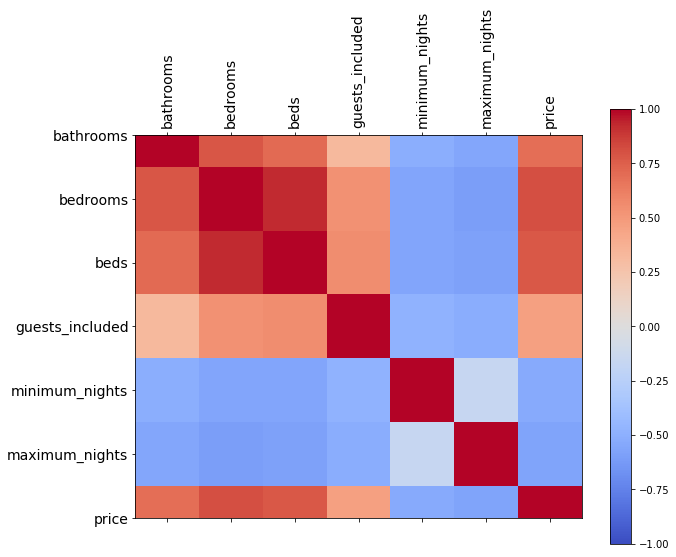

In [57]:
#  Create a confusion matrix for facilities
correlation_matrix(corr_facl)

### Observation:

__Facilities and Price__: Beds, bedrooms and bathrooms have positive effect on price but minimum and maximum nights are not showing any impact on pricing.